# NTDS assignment 2: network models
[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), *PhD student*, [EPFL](http://epfl.ch) [LTS4](http://lts4.epfl.ch)

For this assignment we will work on a network representing the collaboration between scientists in the field of General Relativity and Quantum Cosmology. The network comes from [SNAP](http://snap.stanford.edu/data/ca-GrQc.html) and is described as follows:

> Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network is from the e-print [arXiv](https://arxiv.org) and covers scientific collaborations between authors papers submitted to General Relativity and Quantum Cosmology category. If an author *i* co-authored a paper with author *j*, the graph contains a undirected edge from *i* to *j*. If the paper is co-authored by *k* authors this generates a completely connected (sub)graph on *k* nodes. The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv.

In [1]:
%matplotlib inline

import os
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
G = nx.read_edgelist(os.path.join('arxiv_collaboration_network.txt'))

In [3]:
print('My network has {} nodes.'.format(len(G.nodes())))
print('My network has {} edges.'.format(G.size()))

My network has 5242 nodes.
My network has 14496 edges.


In [4]:
#nx.draw(G)

## 1. Comparing to model networks

1.1 In this part of the assignment, you have to create an Erdős–Rényi and Barabási-Albert graph using NetworkX, and compare them to the collaboration network. Try to simulate the original network as best as you can. When choosing parameters for the networks, take into account the number of vertices and edges of the original network. The number of vertices should be exactly the same. Comment on your choice of parameters.

In [11]:
G_num_nodes = len(G.nodes())
G_num_edges = G.size()


With Erdős–Rényi graph, each node has a probability p to be connected to another node. 

As a result we can compute the average number of edges:

$<L> = p \frac{N\cdot (N-1)}{2}$

*L is the average number of links (or edges) in the graph

*N is the number of nodes

As $<L>$ is given, we can compute the probability p : 

$p = \frac{2\cdot<L>}{N\cdot (N-1)}$

In [60]:
max_num_edges = (num_nodes * (num_nodes - 1)) / 2

# probality p of the Erdős–Rényi graph
p_edge = num_edges / max_num_edges

p_edge

0.001055278280507905

In [61]:
er = nx.erdos_renyi_graph(num_nodes, p_edge)

In [62]:
t = num_nodes
m = round((num_edges) / t)

t, m

(5242, 3)

In [63]:
ba = nx.barabasi_albert_graph(t, m)

**Your answer here.**

In [64]:
print('My Erdős–Rényi network has {} nodes.'.format(len(er.nodes())))
print('My Erdős–Rényi network has {} edges.'.format(er.size()))
print('My Barabási-Albert network has {} nodes.'.format(len(ba.nodes())))
print('My Barabási-Albert network has {} edges.'.format(ba.size()))

My Erdős–Rényi network has 5242 nodes.
My Erdős–Rényi network has 14198 edges.
My Barabási-Albert network has 5242 nodes.
My Barabási-Albert network has 15717 edges.


1.2 Check the size of the largest connected component in each graph and compare them to the original network. In the Erdős–Rényi model, what should the probability of creating each edge be in order to have the same expected size of the largest component? Justify. Generate a graph with this parameter to check if you indeed get a similar value.

In [77]:
giant_G = max(nx.connected_component_subgraphs(G), key=len)
giant_er = max(nx.connected_component_subgraphs(er), key=len)
giant_ba = max(nx.connected_component_subgraphs(ba), key=len)
print(len(giant_G.nodes()))
print(len(giant_er.nodes()))
print(len(giant_ba.nodes()))

4158
5217
5242


**Your answer here.**

From the lecture :

k = p_giant * (N - 1)

S = 1 - np.exp(-k * S)

S = Ng / N

->

p_giant = - log(1 - Ng / N) * N / (Ng * (N - 1))


In [90]:
# Setting variables with name according to the theory
N = num_nodes
Ng = len(giant_G.nodes())

N, Ng

(5242, 4158)

In [91]:
# Computing p_giant
p_giant = - np.log(1 - Ng/N) * N / (Ng * (N - 1))
p_giant

0.00037911157202514915

In [92]:
# Creating the new ER graph with p_giant
er_2 = nx.erdos_renyi_graph(N, p_giant)

# Finding the GC
er_giant =  max(nx.connected_component_subgraphs(er_2), key=len)

In [93]:
# Checking if it works
print('The parameter p for an Erdős–Rényi network with the same expected size of the giant component is {}.'.format(p_giant))
print('The size of the component in a randomly generated network with this parameter is {}.'.format(len(er_giant.nodes())))

The parameter p for an Erdős–Rényi network with the same expected size of the giant component is 0.00037911157202514915.
The size of the component in a randomly generated network with this parameter is 4166.


1.3 Look at the clustering coefficient of the original network. Is there a network model we talked about that could have a clustering coefficient that is close? Explain.

In [94]:
nx.average_clustering(G)

0.529635811052136

**Your answer here.**

In [95]:
avg_clust_er = nx.average_clustering(er)
avg_clust_er_2 = nx.average_clustering(er_2)

avg_clust_ba = nx.average_clustering(ba)

avg_clust_er, avg_clust_er_2, avg_clust_ba

(0.001024392115578685, 0.0001680565396704275, 0.007958898147822057)

As we can see, the average clustering coefficient of each of our three graphs is not even close to the original one.

WHY ? -> answer

This demonstrates that computing the number of nodes, edge or the GC size is not enough to consider any graph similar to another one

## 2. Creating a network with a predefined degree distribution

In this part of the assignment, you will have to create a random network from a predefined degree distribution. There are several network models which can create a random network with the exact same degree distribution as the original, or with the same expected distribution as the original. Refer to section 4.8 of [the Barabási book](http://networksciencebook.com) for more information.

One of the most famous ones is the configuration model. The model for a graph with $L$ edges in total is constructed in the following steps:

- Assign a degree to each node, represented as stubs (half-links). The degree sequence is either generated analytically from a preselected distribution, or it is extracted from the adjacency matrix of a real network. Note that we must start from an even number of stubs to avoid being left with unpaired stubs.
- Randomly select a stub pair and connect them. Then randomly choose another pair from the remaining $2L - 2$ stubs and connect them. This procedure is repeated until all stubs are paired up.

*Reminder:* A stub is a half-link, representing the half of an edge. It contains one node and can be paired up with another stub to create an edge (between the two corresponding nodes).

2.1 However, this model allows for the creation of multi-links (multiple edges between the same pair of vertices) and self-loops, thus leading to a non-simple graph. In this assignment, you will implement a greedy configuration model, to avoid these problems.

The algorithm goes as follows:
- Extract the degree sequence from our collaboration network.
- Assign a target degree to each node, represented as stubs or half-links. Use the degree sequence extracted from the collaboration network.
- Sort the nodes by degree. 
    - Pick the node with the highest target degree. Delete all its stubs from the list of stubs to make sure we don't create a self loop.
    - Until all its weighted degree equals its target degree: 
        - Randomly select one stub from the list of stubs (corresponding to one of the other nodes), and connect these two nodes. In case the two chosen nodes are already connected, simply increase the weight of this edge by one. Be careful to randomly select from stubs and not from nodes, as this means the chances of selecting a node will be proportional to its target degree.
    - When the number of edges adjacent to this node corresponds to its target degree, go on to the second node in the list. 
    - Repeate this procedure until all stubs are paired up, or there is only one node left with a pair number of stubs. In that case, don't create a self-loop, but discard the stubs.
    
*Hints*: 
 - Use `nx.empty_graph()` to create an empty graph.
 - Use `G.add_edge(node1,node2,weight = 1)` to add an edge to a weighted graph.
 - Use `G.edge[node1][node2]['weight'] += 1` to increment the weight of an edge by one.

In [163]:
# given a list of remaining stubs per node, 
# it returns the node of a randomly chosen stub
# with equiprobable probability between all stubs

def find_stub(remaining_stubs):
    total_num_stubs = np.sum(remaining_stubs)
    if total_num_stubs < 1:
        return -1
    stub_index = np.random.randint(total_num_stubs)
    
    num_stubs_encoutered = 0
    for node, stubs in enumerate(remaining_stubs):
        num_stubs_encoutered += stubs
        if stub_index < num_stubs_encoutered:
            return node
    raise Exception("case not handled yet \o/")

In [171]:
# given 

def find_all_stubs(num_stubs, remaining_stubs, offset=0):
    all_stubs = []
    for _ in range(num_stubs):
        stub = find_stub(remaining_stubs)
        remaining_stubs[stub] -= 1
        all_stubs.append(stub + offset)
    return all_stubs, remaining_stubs
        

In [172]:
def greedy_configuration(degree_distribution):
    N = len(degree_distribution)
    G = nx.empty_graph(N)
    remaining_stubs = degree_distribution.copy()
    for node, _ in enumerate(degree_distribution):
        num_stubs, *remaining_stubs = remaining_stubs
        offset = node + 1
        linked_nodes, remaining_stubs = find_all_stubs(num_stubs, remaining_stubs, offset)
        for linked_node in linked_nodes:
            if linked_node > node:
                if linked_node in G.edge[node]:
                    G.edge[node][linked_node]['weight'] += 1
                else:
                    G.add_edge(node, linked_node, weight=1)
    return G

In [198]:
degree_distribution=sorted(nx.degree(G).values(),reverse=True) # degree distribution sorted from highest to lowest
gc = greedy_configuration(degree_distribution)

2.2 Verify that the networks have the same number of nodes. Plot the difference between the weighted degree distributions to verify that they are identical. If not, why?

In [200]:
degree_sequence_gc=sorted(nx.degree(gc, weight = 'weight').values(),reverse=True) #weighted degree distribution
# Your code here.

degree_diff = np.array(degree_distribution) - np.array(degree_sequence_gc)

assert degree_diff.sum() == 0, "Degree distribution of both graphs should be similar"

**Your answer here.**



There are no differences

2.3 Should these two networks have the same adjacency matrices? Justify.

**Your answer here.**

No, or at least with very low probability. Why? Although we are keeping the degree distribution, the edges are created randomly (weighted with the degree distribution) between all nodes, hence we shouldn't expect same adjacency matrices.

In [201]:
differences = np.nonzero(nx.adjacency_matrix(G) - nx.adjacency_matrix(gc))

len(differences[0]), differences[0]

(57568, array([   0,    0,    0, ..., 5241, 5241, 5241], dtype=int32))

2.4 Draw both the generated and original networks. Are they similar? If not, why? Try to explain.

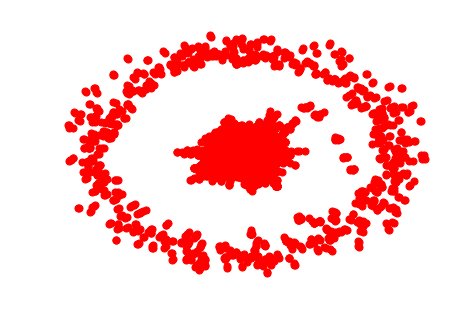

In [202]:
nx.draw(G, node_size=50, width=0.6)

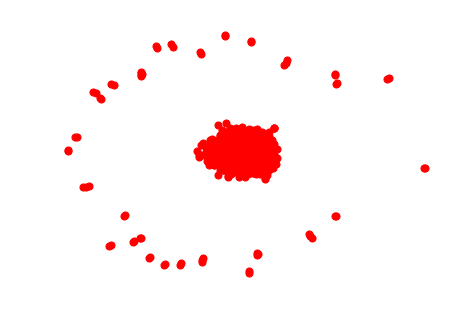

In [203]:
nx.draw(gc, node_size=50, width=0.6)

**Your answer here.**

EXPLANATIONS HERE

2.5 Do you expect the properties studied in the first part of the assignment to be close to the original graph? Justify.

**Your answer here.**

YES/NO, BECAUSE....

In [217]:
def print_properties(G):
    print('Network has {} nodes.'.format(len(G.nodes())))
    print('Network has {} edges.'.format(G.size()))
    connected_components = list(nx.connected_component_subgraphs(G))
    print('Network has {} connected components'.format(len(connected_components)))
    giant_G = max(connected_components, key=len)
    print('Network has GC of size = {}'.format(len(giant_G.nodes())))
    print('Network has clustering coefficient = {}'.format(nx.average_clustering(G)))

In [218]:
print_properties(G)

Network has 5242 nodes.
Network has 14496 edges.
Network has 355 connected components
Network has GC of size = 4158
Network has clustering coefficient = 0.529635811052136


In [219]:
print_properties(gc)

Network has 5242 nodes.
Network has 14445 edges.
Network has 30 connected components
Network has GC of size = 5176
Network has clustering coefficient = 0.00547304580842176
